In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [69]:
ddata = pd.read_csv('WaterQualityMoco.csv')
ddata

,ActivityStartDate,HydrologicEvent,ResultDetectionConditionText,CharacteristicName,ResultSampleFractionText,ResultMeasureValue,DetectionQuantitationLimitMeasure/MeasureValue,ResultAnalyticalMethod/MethodName,ResultAnalyticalMethod/MethodDescriptionText,LaboratoryName,...,SampleCollectionMethod/MethodName,SampleCollectionMethod/MethodDescriptionText,SampleCollectionEquipmentName,ResultIdentifier,MeasureQualifierCode,ResultStatusIdentifier,ResultValueTypeName,USGSPCode,ResultAnalyticalMethod/MethodIdentifier,ResultAnalyticalMethod/MethodIdentifierContext
0,4/6/2021,Routine sample,NaN,Escherichia coli,NaN,81.0,NaN,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey-Water Resources Discipline,...,"10 or more equal width verticals, equal non-is...",NaN,US DH-81,NWIS-120863344,NaN,Accepted,Actual,50468.0,BAC15,USGS
1,4/6/2021,Routine sample,NaN,Total Coliform,Total,2000.0,NaN,"Total coliform, Colilert-18",Standard Methods,U.S. Geological Survey-Water Resources Discipline,...,"10 or more equal width verticals, equal non-is...",NaN,US DH-81,NWIS-120863345,NaN,Accepted,Actual,50569.0,BAC48,USGS
2,3/28/2021,Storm,NaN,Escherichia coli,NaN,86.0,NaN,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey,...,Point sample,NaN,"Sampler, point, automatic",NWIS-120811125,NaN,Accepted,Actual,50468.0,BAC15,USGS
3,3/28/2021,Storm,NaN,Total Coliform,Total,2900.0,NaN,"Total coliform, Colilert-18",Standard Methods,U.S. Geological Survey,...,Point sample,NaN,"Sampler, point, automatic",NWIS-120811126,NaN,Accepted,Actual,50569.0,BAC48,USGS
4,10/25/2021,Storm,NaN,Escherichia coli,NaN,82000.0,NaN,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey,...,Point sample,NaN,"Sampler, point, automatic",NWIS-122669339,NaN,Accepted,Actual,50468.0,BAC15,USGS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,10/4/2022,NaN,NaN,Escherichia coli,Total,980.0,NaN,9223 B ~ Enzyme Substrate Test,https://www.nemi.gov/methods/method_summary/5583,NaN,...,Bucket/Bottle Grab,NaN,Water Bottle,STORET-979863517,NaN,Final,Actual,NaN,9223-B,APHA_SM22ED
1211,10/4/2022,NaN,NaN,Escherichia coli,Total,2430.0,NaN,9223 B ~ Enzyme Substrate Test,https://www.nemi.gov/methods/method_summary/5583,NaN,...,Bucket/Bottle Grab,NaN,Water Bottle,STORET-979863540,NaN,Final,Actual,NaN,9223-B,APHA_SM22ED
1212,11/15/2022,NaN,NaN,Escherichia coli,Total,461.0,NaN,9223 B ~ Enzyme Substrate Test,https://www.nemi.gov/methods/method_summary/5583,NaN,...,Bucket/Bottle Grab,NaN,Water Bottle,STORET-979863827,NaN,Final,Actual,NaN,9223-B,APHA_SM22ED
1213,10/4/2022,NaN,NaN,Escherichia coli,Total,1733.0,NaN,9223 B ~ Enzyme Substrate Test,https://www.nemi.gov/methods/method_summary/5583,NaN,...,Bucket/Bottle Grab,NaN,Water Bottle,STORET-979863545,NaN,Final,Actual,NaN,9223-B,APHA_SM22ED


In [70]:
ddata['DetectionQuantitationLimitMeasure/MeasureValue'].unique()

array([     nan, 2.40e+05, 1.00e-03, 5.00e-03, 5.00e-02, 3.00e-03,
       2.00e-04, 3.60e+00, 2.30e+00, 2.80e+00, 3.70e+00, 3.40e+00,
       2.60e+00, 1.70e+00, 2.20e+00, 1.07e+01, 1.40e+00, 1.60e+00,
       3.00e+00, 1.50e+00, 7.40e+00, 4.60e+00, 4.40e+00, 2.90e+00,
       1.30e+00, 3.30e+00, 1.80e+00, 2.40e+00, 2.70e+00, 6.60e+00,
       1.60e+02, 2.50e+00, 4.10e+00, 3.10e+00, 3.20e+00, 2.10e+00,
       2.00e+00, 3.90e+00, 1.10e+00, 5.40e+00, 1.20e+00, 5.80e+00,
       3.80e+00, 1.15e+01, 1.90e+00, 2.00e+02, 4.00e+00, 1.40e+01,
       5.60e+00, 4.30e+00, 1.39e+01, 1.78e+01, 2.11e+01, 4.50e+00,
       9.40e+00, 8.00e+01, 6.00e+01])

In [71]:
for index, row in ddata.iterrows():
    ddata.loc[index,'outcome'] = 0
    if row['CharacteristicName'] == 'Escherichia coli' :
        ddata.loc[index,'outcome'] = 1
    if row['CharacteristicName'] == 'Uranium':
        ddata.loc[index,'outcome'] = 1
    if (row['ResultAnalyticalMethod/MethodDescriptionText'] == 'Pesticides, water, SPE GC&LC/TMS') & (row['ResultDetectionConditionText'] != "Not Detected") :
        ddata.loc[index,'outcome'] = 1
    if (row['ResultAnalyticalMethod/MethodDescriptionText'] == 'Pharma, wf, LC/MS/MS (Sch 2440)') & (row['ResultDetectionConditionText'] != 'Not Detected') :
        ddata.loc[index,'outcome'] = 1
    if np.isnan(row['ResultMeasureValue']) :
        ddata.loc[index,'ResultMeasureValue'] = 0.0
    if ddata.loc[index,'DetectionQuantitationLimitMeasure/MeasureValue'] > 0 :
        ddata.loc[index,'Rate'] = ddata.loc[index,'ResultMeasureValue'] / ddata.loc[index,'DetectionQuantitationLimitMeasure/MeasureValue']
    else :
        ddata.loc[index,'Rate'] = 0
ddata.head()

,ActivityStartDate,HydrologicEvent,ResultDetectionConditionText,CharacteristicName,ResultSampleFractionText,ResultMeasureValue,DetectionQuantitationLimitMeasure/MeasureValue,ResultAnalyticalMethod/MethodName,ResultAnalyticalMethod/MethodDescriptionText,LaboratoryName,...,SampleCollectionEquipmentName,ResultIdentifier,MeasureQualifierCode,ResultStatusIdentifier,ResultValueTypeName,USGSPCode,ResultAnalyticalMethod/MethodIdentifier,ResultAnalyticalMethod/MethodIdentifierContext,outcome,Rate
0,4/6/2021,Routine sample,NaN,Escherichia coli,NaN,81.0,NaN,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey-Water Resources Discipline,...,US DH-81,NWIS-120863344,NaN,Accepted,Actual,50468.0,BAC15,USGS,1.0,0.0
1,4/6/2021,Routine sample,NaN,Total Coliform,Total,2000.0,NaN,"Total coliform, Colilert-18",Standard Methods,U.S. Geological Survey-Water Resources Discipline,...,US DH-81,NWIS-120863345,NaN,Accepted,Actual,50569.0,BAC48,USGS,0.0,0.0
2,3/28/2021,Storm,NaN,Escherichia coli,NaN,86.0,NaN,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey,...,"Sampler, point, automatic",NWIS-120811125,NaN,Accepted,Actual,50468.0,BAC15,USGS,1.0,0.0
3,3/28/2021,Storm,NaN,Total Coliform,Total,2900.0,NaN,"Total coliform, Colilert-18",Standard Methods,U.S. Geological Survey,...,"Sampler, point, automatic",NWIS-120811126,NaN,Accepted,Actual,50569.0,BAC48,USGS,0.0,0.0
4,10/25/2021,Storm,NaN,Escherichia coli,NaN,82000.0,NaN,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey,...,"Sampler, point, automatic",NWIS-122669339,NaN,Accepted,Actual,50468.0,BAC15,USGS,1.0,0.0


In [72]:
ecoli = ddata[ddata['CharacteristicName'] == 'Escherichia coli']
ecoli

,ActivityStartDate,HydrologicEvent,ResultDetectionConditionText,CharacteristicName,ResultSampleFractionText,ResultMeasureValue,DetectionQuantitationLimitMeasure/MeasureValue,ResultAnalyticalMethod/MethodName,ResultAnalyticalMethod/MethodDescriptionText,LaboratoryName,...,SampleCollectionEquipmentName,ResultIdentifier,MeasureQualifierCode,ResultStatusIdentifier,ResultValueTypeName,USGSPCode,ResultAnalyticalMethod/MethodIdentifier,ResultAnalyticalMethod/MethodIdentifierContext,outcome,Rate
0,4/6/2021,Routine sample,NaN,Escherichia coli,NaN,81.0,NaN,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey-Water Resources Discipline,...,US DH-81,NWIS-120863344,NaN,Accepted,Actual,50468.0,BAC15,USGS,1.0,0.0
2,3/28/2021,Storm,NaN,Escherichia coli,NaN,86.0,NaN,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey,...,"Sampler, point, automatic",NWIS-120811125,NaN,Accepted,Actual,50468.0,BAC15,USGS,1.0,0.0
4,10/25/2021,Storm,NaN,Escherichia coli,NaN,82000.0,NaN,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey,...,"Sampler, point, automatic",NWIS-122669339,NaN,Accepted,Actual,50468.0,BAC15,USGS,1.0,0.0
6,3/18/2021,Storm,NaN,Escherichia coli,NaN,2600.0,NaN,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey,...,US DH-81,NWIS-120773041,NaN,Accepted,Actual,50468.0,BAC15,USGS,1.0,0.0
8,3/10/2021,Routine sample,NaN,Escherichia coli,NaN,1700.0,NaN,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey-Water Resources Discipline,...,US DH-81,NWIS-120691892,NaN,Accepted,Actual,50468.0,BAC15,USGS,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,10/4/2022,NaN,NaN,Escherichia coli,Total,980.0,NaN,9223 B ~ Enzyme Substrate Test,https://www.nemi.gov/methods/method_summary/5583,NaN,...,Water Bottle,STORET-979863517,NaN,Final,Actual,NaN,9223-B,APHA_SM22ED,1.0,0.0
1211,10/4/2022,NaN,NaN,Escherichia coli,Total,2430.0,NaN,9223 B ~ Enzyme Substrate Test,https://www.nemi.gov/methods/method_summary/5583,NaN,...,Water Bottle,STORET-979863540,NaN,Final,Actual,NaN,9223-B,APHA_SM22ED,1.0,0.0
1212,11/15/2022,NaN,NaN,Escherichia coli,Total,461.0,NaN,9223 B ~ Enzyme Substrate Test,https://www.nemi.gov/methods/method_summary/5583,NaN,...,Water Bottle,STORET-979863827,NaN,Final,Actual,NaN,9223-B,APHA_SM22ED,1.0,0.0
1213,10/4/2022,NaN,NaN,Escherichia coli,Total,1733.0,NaN,9223 B ~ Enzyme Substrate Test,https://www.nemi.gov/methods/method_summary/5583,NaN,...,Water Bottle,STORET-979863545,NaN,Final,Actual,NaN,9223-B,APHA_SM22ED,1.0,0.0


In [73]:
ecoli['DetectionQuantitationLimitMeasure/MeasureValue'].unique()

array([    nan, 240000.])

In [74]:
LE = preprocessing.LabelEncoder()
ecoli['event_identifier'] = LE.fit_transform(ecoli['HydrologicEvent'])
ecoli.loc[:, ['event_identifier', 'HydrologicEvent']]

/tmp/ipykernel_11415/4109857367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecoli['event_identifier'] = LE.fit_transform(ecoli['HydrologicEvent'])


,event_identifier,HydrologicEvent
0,0,Routine sample
2,2,Storm
4,2,Storm
6,2,Storm
8,0,Routine sample
...,...,...
1210,3,NaN
1211,3,NaN
1212,3,NaN
1213,3,NaN


In [75]:
X = ecoli.loc[:, ['event_identifier', 'ResultMeasureValue', '']]
y = ecoli.outcome
X.head()

KeyError: "[''] not in index"

In [ ]:
# Split the data into train and test, 25%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# Instantiate, preprocess, train, and predict (test)
LogReg = LogisticRegression()

In [ ]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)
y_pred=LogReg.predict(X_test)
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1.0

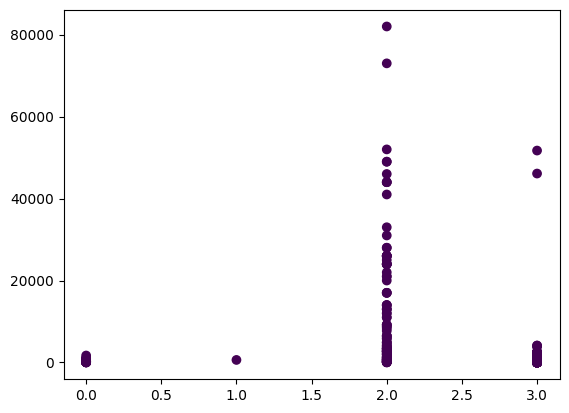

In [ ]:
x = X['event_identifier']
w = X['ResultMeasureValue']
plt.scatter(X['event_identifier'], X['ResultMeasureValue'], c = y)